In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Phase 1

In [101]:
reader = csv.reader(open("./data/phase1/phase1.csv", "r"))
next(reader)
data = [row for row in reader]
q = [float(datum[0]) for datum in data]
p = [float(datum[1]) for datum in data]
v = [float(datum[2]) for datum in data]
l = [float(datum[3]) for datum in data]
timeOnRoad = [float(datum[4]) for datum in data]
print("r^2 q: " + str(np.corrcoef(timeOnRoad, q)[0][1]**2*100) + "%")
print("r^2 p: " + str(np.corrcoef(timeOnRoad, p)[0][1]**2*100) + "%")
print("r^2 v: " + str(np.corrcoef(timeOnRoad, v)[0][1]**2*100) + "%")
print("r^2 l: " + str(np.corrcoef(timeOnRoad, l)[0][1]**2*100) + "%")
print("r^2 total: " + str(np.corrcoef(timeOnRoad, q)[0][1]**2*100 + np.corrcoef(timeOnRoad, p)[0][1]**2*100 + np.corrcoef(timeOnRoad, v)[0][1]**2*100 + np.corrcoef(timeOnRoad, l)[0][1]**2*100) + "%")

r^2 q: 0.8815084999928061%
r^2 p: 27.715235594385497%
r^2 v: 0.9058698441521164%
r^2 l: 40.35947429104253%
r^2 total: 69.86208822957295%


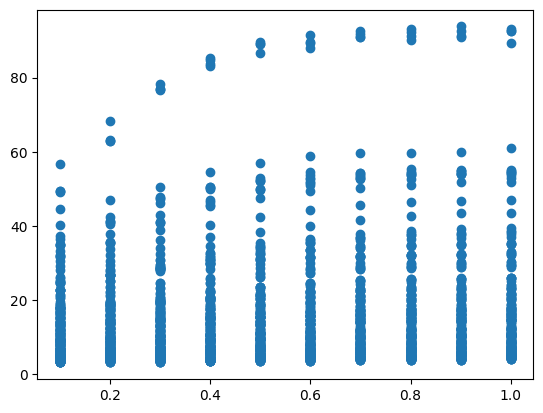

In [102]:
plt.scatter(q, timeOnRoad)
plt.savefig("./data/phase1/q_vs_timeOnRoad.png")

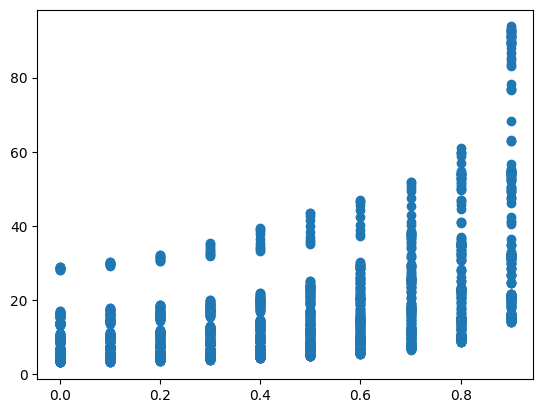

In [103]:
plt.scatter(p, timeOnRoad)
plt.savefig("./data/phase1/p_vs_timeOnRoad.png")

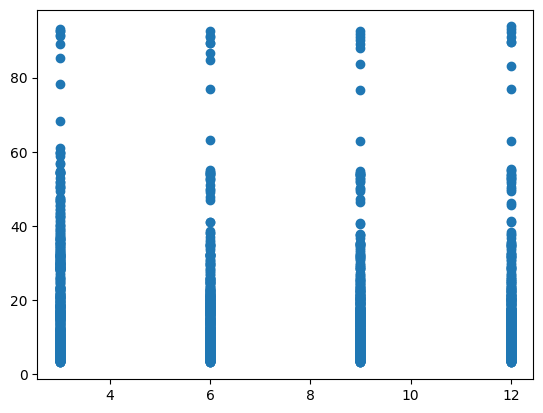

In [104]:
plt.scatter(v, timeOnRoad)
plt.savefig("./data/phase1/v_vs_timeOnRoad.png")

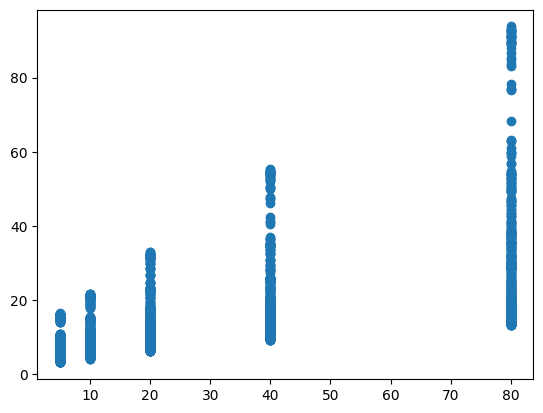

In [105]:
plt.scatter(l, timeOnRoad)
plt.savefig("./data/phase1/l_vs_timeOnRoad.png")